<a href="https://colab.research.google.com/github/saransh317/Self-Implementation-Neural-Network/blob/main/L_layer_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from dnn_utils import sigmoid, relu, relu_backward, sigmoid_backward
import matplotlib.pyplot as plt
import h5py

In [ ]:
def initialize_parameters_deep(layer_dims):
    parameters = {}
    L = len(layer_dims)
    for l in range(1,L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])/np.sqrt(layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
    
    return parameters

In [ ]:
def linear_forward(A,W,b):
    Z = W.dot(A) + b
    assert(Z.shape == (W.shape[0],A.shape[1]))
    cache = (A,W,b)
    return Z, cache

In [ ]:
def linear_activation_forward(A_prev, W, b, activation):
    if activation == "sigmoid":
      Z, linear_cache = linear_forward(A_prev, W, b)
      A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
      Z, linear_cache = linear_forward(A_prev, W, b)
      A, activation_cache = relu(Z) 
        
    assert (A.shape == (W.shape[0],A_prev.shape[1]))
    cache = (linear_cache, activation_cache)
    
    return A, cache

In [ ]:
def L_model_forward(X, parameters):
    caches = []
    A = X
    L= len(parameters)//2
    
    for l in range(1,L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters['W'+str(l)],
                                 parameters['b'+str(l)], activation='relu')
        caches.append(cache)
    
    AL, cache = linear_activation_forward(A, parameters['W'+str(L)],
                                 parameters['b'+str(L)], activation='sigmoid')
    caches.append(cache)
    
    assert(AL.shape == (1, X.shape[1]))
    
    return AL, caches

In [ ]:
def compute_cost(AL,Y):
    m = Y.shape[1]
    cost = (-1./m)*(np.dot(Y,np.log(AL).T) + np.dot(1-Y, np.log(1-AL).T))
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    return cost

In [ ]:
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    dW = (1./m)*np.dot(dZ, A_prev.T)
    db = (1./m)*(np.sum(dZ, axis=1, keepdims=True))
    dA_prev = np.dot(W.T, dZ)
    
    assert(dW.shape == W.shape)
    assert(dA_prev.shape == A_prev.shape)
    assert(db.shape == b.shape)
    
    return dA_prev, dW, db

In [ ]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    if activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
    
    elif activation == "relu":
        dZ = relu_backward(dA, activation_cache) 
    
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db  

In [ ]:
def L_model_backward(AL, y, caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = y.reshape(AL.shape)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL,
                                                                                                  current_cache,
                                                                                                  activation="sigmoid")
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 2)], 
                                                                    current_cache, activation = "relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [ ]:
def update_parameters(parameters, grads, learning_rate):
    L = (len(parameters)//2) 
    
    for l in range(L):
      parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
      parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
      
        
    return parameters

In [ ]:
import h5py

def load_data():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [ ]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 0. It's a non-cat picture.


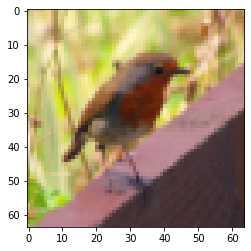

In [ ]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0, index]) + ". It's a " + classes[train_y[0, index]].decode("utf-8") + " picture.")

In [ ]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [ ]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten / 255.
test_x = test_x_flatten / 255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [ ]:
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [ ]:
def two_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):
    
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    parameters = initialize_parameters_deep(layers_dims)
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    

    for i in range(0, num_iterations):
        
        A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
        
        A2, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')
        cost = compute_cost(A2, Y)
        
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')
        
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.9135185353107249
Cost after iteration 100: 0.5472411896786449
Cost after iteration 200: 0.45354300211415255
Cost after iteration 300: 0.4118769774510219
Cost after iteration 400: 0.37600635990318554
Cost after iteration 500: 0.3454888793615697
Cost after iteration 600: 0.31937189550373785
Cost after iteration 700: 0.29398421052663415
Cost after iteration 800: 0.2515643900207493
Cost after iteration 900: 0.18134176522159445
Cost after iteration 1000: 0.1539978704099592
Cost after iteration 1100: 0.13414959801531315
Cost after iteration 1200: 0.1185862633456464
Cost after iteration 1300: 0.4810489089763897
Cost after iteration 1400: 0.107270843949857
Cost after iteration 1500: 0.09528168777333171
Cost after iteration 1600: 0.08494636012669488
Cost after iteration 1700: 0.07616722176552262
Cost after iteration 1800: 0.06863899856080713
Cost after iteration 1900: 0.0620967704414595
Cost after iteration 2000: 0.056403603995482825
Cost after iteration 2100: 0.051491

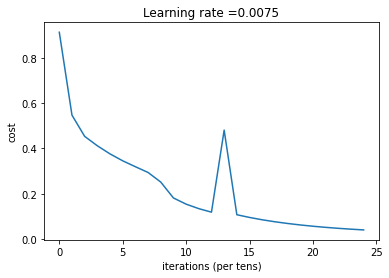

In [ ]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

In [ ]:
def predict(X, y, parameters):
    m = X.shape[1]
    n = len(parameters) // 2
    p = np.zeros((1, m),dtype=int)
    probas, caches = L_model_forward(X, parameters)

    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: %s" % str(np.sum(p == y)/float(m)))
        
    return p

In [ ]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 1.0


In [ ]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.72


5 LAYER NETWORK

In [ ]:
def L_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=1200, print_cost=False):
    costs = []
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation:
        AL, caches = L_model_forward(X, parameters)
                
        # Compute cost.
        cost = compute_cost(AL, Y)
            
        # Backward propagation.      
        grads = L_model_backward(AL, Y, caches)
         
        # Update parameters.        
        parameters = update_parameters(parameters, grads, learning_rate)
                        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.696603
Cost after iteration 100: 0.620007
Cost after iteration 200: 0.577090
Cost after iteration 300: 0.532736
Cost after iteration 400: 0.497420
Cost after iteration 500: 0.471408
Cost after iteration 600: 0.449528
Cost after iteration 700: 0.428733
Cost after iteration 800: 0.409316
Cost after iteration 900: 0.390561
Cost after iteration 1000: 0.371811
Cost after iteration 1100: 0.351915


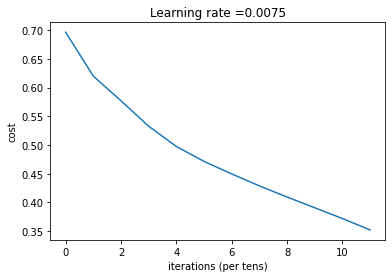

In [ ]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations=1200, print_cost=True)

In [ ]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9043062200956937


In [ ]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.64


Predict with my own image

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


Accuracy: 1.0
y = 0, your L-layer model predicts a "non-cat" picture.


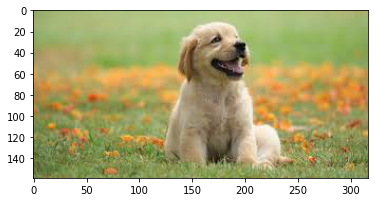

In [ ]:
from skimage import *

my_image = "/content/dog.jpg" # change this to the name of your image file 
my_label_y = [0] # the true class of your image (1 -> cat, 0 -> non-cat)

fname = my_image
image = np.array(plt.imread(fname))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
my_predicted_image = predict(my_image, my_label_y, parameters)

plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")